# 14. Интерполяция. Длина тормозного пути

(Моулер) В следующей таблице приведены данные о длине тормозного пути  𝑑 некоторого автомобиля в зависимости от его скорости  𝑣 в начале пути:
  v   |   d
  0   |   0
 10   |   5
 20   |   20
 30   |   46
 40   |   70
 50   |   102
 60   |   153

Какова должна быть максимальная скорость автомобиля, чтобы длина тормозного пути не превосходила бы  60? Решить задачу следующими способами:
- кусочной линейной интерполяцией,
- кусочной кубической интерполяцией,
- обратной кубической интерполяцией.
Придумать и реализовать новый способ. Нарисовать графики построенных интерполянтов. Сравнить результаты.

## Кусочная линейная


Максимальная скорость, при которой длина тормозного пути не превосходит 60, равна 35.833333333333336 км/ч


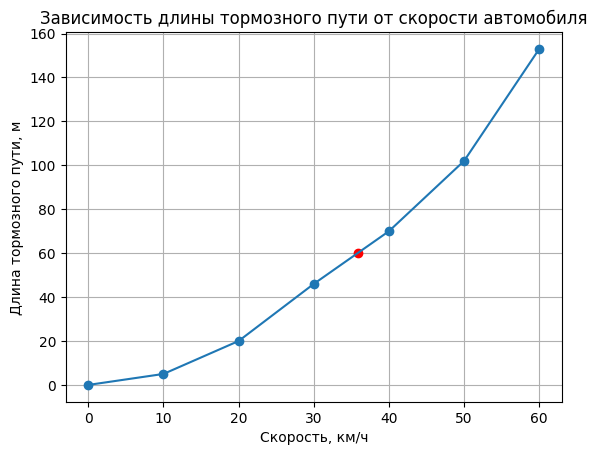

In [110]:
import matplotlib.pyplot as plt

v = [0, 10, 20, 30, 40, 50, 60]
d = [0, 5, 20, 46, 70, 102, 153]

# Кусочная линейная интерполяция
for i in range(len(v) - 1):
    if d[i] <= 60 < d[i+1]:
        slope = (d[i+1] - d[i]) / (v[i+1] - v[i])
        max_v = v[i] + (60 - d[i]) / slope
        print("Максимальная скорость, при которой длина тормозного пути не превосходит 60, равна", max_v, "км/ч")
    elif 60 <= d[i]:
        break
        
# График зависимости длины тормозного пути от скорости автомобиля
plt.plot(max_v, 60, 'ro')
plt.plot(v, d, 'o-')
plt.title('Зависимость длины тормозного пути от скорости автомобиля')
plt.xlabel('Скорость, км/ч')
plt.ylabel('Длина тормозного пути, м')
plt.grid()
plt.show()

# Кусочная кубическая

Максимальная скорость, при которой длина тормозного пути не превосходит 60, равна 35.75757575757576 км/ч


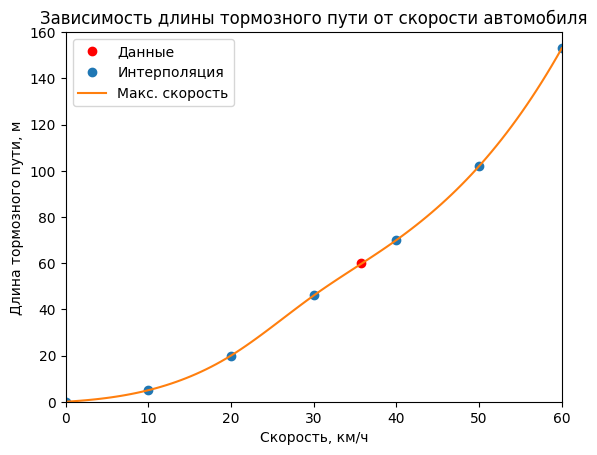

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# данные о скорости и длине тормозного пути
v = np.array([0, 10, 20, 30, 40, 50, 60])
d = np.array([0, 5, 20, 46, 70, 102, 153])

# интерполяция
f = interp1d(v, d, kind='cubic')
v_new = np.linspace(0, 60, num=100)
d_new = f(v_new)

# поиск максимальной скорости
v_max = max(v_new[d_new <= 60])
print("Максимальная скорость, при которой длина тормозного пути не превосходит 60, равна", v_max, "км/ч")

# построение графика
plt.plot(v_max, 60, 'ro')
plt.plot(v, d, 'o')
plt.plot(v_new, d_new, '-')
plt.xlim(0, 60)
plt.ylim(0, 160)
plt.title('Зависимость длины тормозного пути от скорости автомобиля')
plt.xlabel('Скорость, км/ч')
plt.ylabel('Длина тормозного пути, м')
plt.legend(['Данные', 'Интерполяция', 'Макс. скорость'], loc='upper left')
plt.show()


# Обратная кубическая

Максимальная скорость, при которой длина тормозного пути не превосходит 60, равна 35.864332204511726 км/ч


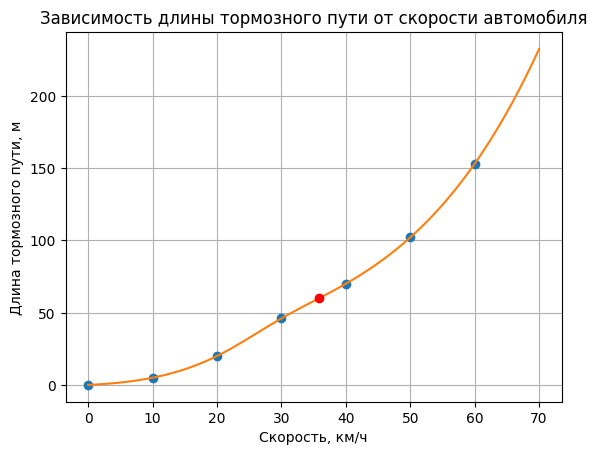

In [113]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

v = [0, 10, 20, 30, 40, 50, 60]
d = [0, 5, 20, 46, 70, 102, 153]

cs = CubicSpline(v, d)
f = lambda x: cs(x) - 60

from scipy.optimize import brentq

max_speed = brentq(f, 0, 60)
print("Максимальная скорость, при которой длина тормозного пути не превосходит 60, равна", max_speed, "км/ч")

v_values = np.linspace(0, 70, 100)
d_values = [cs(v) for v in v_values]
plt.plot(v, d, 'o', label='данные')
plt.plot(v_values, d_values)
plt.plot([max_speed], [60], 'ro')
plt.title('Зависимость длины тормозного пути от скорости автомобиля')
plt.xlabel('Скорость, км/ч')
plt.ylabel('Длина тормозного пути, м')
plt.grid()
plt.show()

# Доп. способ

Максимальная скорость, при которой длина тормозного пути не превосходит 60, равна 35.833333333333336 км/ч


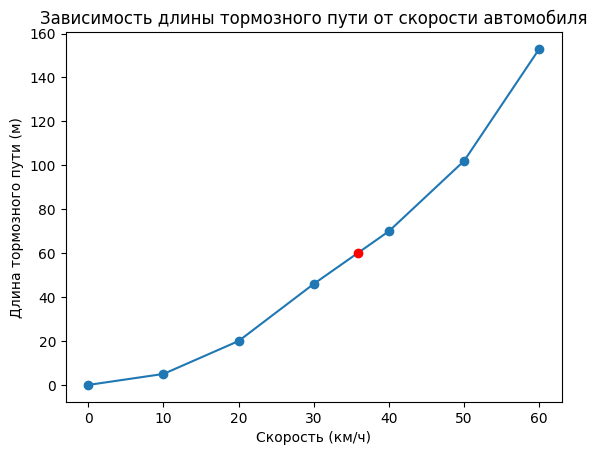

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем массивы данных
v = np.array([0, 10, 20, 30, 40, 50, 60])
d = np.array([0, 5, 20, 46, 70, 102, 153])

# Находим две ближайшие точки, находящиеся ниже и выше искомой длины тормозного пути
i = np.searchsorted(d, 60, side='right')
v1, v2 = v[i-1], v[i]
d1, d2 = d[i-1], d[i]

# Выполняем линейную интерполяцию между этими двумя точками
slope = (d2 - d1) / (v2 - v1)
intercept = d1 - slope * v1
v_maxs = (60 - intercept) / slope

# Построение графика зависимости длины тормозного пути от скорости
plt.plot(v, d, 'o-')
plt.xlabel('Скорость (км/ч)')
plt.ylabel('Длина тормозного пути (м)')
plt.title('Зависимость длины тормозного пути от скорости автомобиля')

# Отметка найденной максимальной скорости на графике
print("Максимальная скорость, при которой длина тормозного пути не превосходит 60, равна", v_maxs ,"км/ч")
plt.plot(v_maxs, 60, 'ro')
plt.show()

## Вывод:

Что могу сказать по результатам, то результаты очень схожие и довольно точные.
Cпособы кусочной кубической и обратной кубической интерполяции на графике выглядят намного приятнее, чем способ кусочно линейной интерполяции.